In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

df = pd.read_csv(r"C:\Users\91630\Downloads\archive (9)\tested.csv")

df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Embarked']:
    df[column] = df[column].astype(str)  # Convert to string to prevent issues with NaN
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Impute Age and Fare again just in case (optional here, already filled)
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for best Random Forest model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

clf_best = grid_search.best_estimator_

# Evaluate model
y_pred = clf_best.predict(X_test)
print("✅ Best Parameters:", grid_search.best_params_)
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🎯 Accuracy: 1.0000

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [9]:
output_df = X_test.copy()

output_df['Actual_Survival'] = y_test.values
output_df['Predicted_Survival'] = y_pred

output_df['Prediction_Label'] = output_df['Predicted_Survival'].map({0: 'Not Survived', 1: 'Survived'})
output_df['Actual_Label'] = output_df['Actual_Survival'].map({0: 'Not Survived', 1: 'Survived'})

print(output_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                 'Actual_Label', 'Prediction_Label']])



     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Actual_Label  \
321       3    1  25.0      0      0    7.2292         0  Not Survived   
324       1    0  39.0      0      0  211.3375         2      Survived   
388       3    1  21.0      0      0    7.7500         1  Not Survived   
56        3    1  35.0      0      0    7.8958         2  Not Survived   
153       3    0  36.0      0      2   12.1833         2      Survived   
..      ...  ...   ...    ...    ...       ...       ...           ...   
57        3    1  25.0      0      0    7.6500         2  Not Survived   
126       3    1  22.0      0      0    7.7958         2  Not Survived   
24        1    0  48.0      1      3  262.3750         0      Survived   
17        3    1  21.0      0      0    7.2250         0  Not Survived   
66        3    0  18.0      0      0    7.8792         1      Survived   

    Prediction_Label  
321     Not Survived  
324         Survived  
388     Not Survived  
56      Not Survive

In [10]:
not_survived_count = (output_df['Predicted_Survival'] == 0).sum()
print(f"Number of passengers predicted as 'Not Survived': {not_survived_count}")

not_survived_df = output_df[output_df['Predicted_Survival'] == 0]

not_survived_df['Prediction_Label'] = not_survived_df['Predicted_Survival'].map({0: 'Not Survived', 1: 'Survived'})
not_survived_df['Actual_Label'] = not_survived_df['Actual_Survival'].map({0: 'Not Survived', 1: 'Survived'})

print(not_survived_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                       'Actual_Label', 'Prediction_Label']])


Number of passengers predicted as 'Not Survived': 50
     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Actual_Label  \
321       3    1  25.0      0      0    7.2292         0  Not Survived   
388       3    1  21.0      0      0    7.7500         1  Not Survived   
56        3    1  35.0      0      0    7.8958         2  Not Survived   
30        2    1  50.0      1      0   26.0000         2  Not Survived   
82        1    1  49.0      0      0   26.0000         2  Not Survived   
416       3    1  27.0      0      0    8.0500         2  Not Survived   
9         3    1  21.0      2      0   24.1500         2  Not Survived   
413       3    1  27.0      0      0    8.0500         2  Not Survived   
39        3    1  27.0      0      0   56.4958         2  Not Survived   
378       1    1  55.0      0      0   50.0000         2  Not Survived   
55        3    1  10.0      4      1   29.1250         1  Not Survived   
406       2    1  23.0      1      0   10.5000         2  N

C:\Users\91630\AppData\Local\Temp\ipykernel_17452\2386321017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_survived_df['Prediction_Label'] = not_survived_df['Predicted_Survival'].map({0: 'Not Survived', 1: 'Survived'})
C:\Users\91630\AppData\Local\Temp\ipykernel_17452\2386321017.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_survived_df['Actual_Label'] = not_survived_df['Actual_Survival'].map({0: 'Not Survived', 1: 'Survived'})


In [11]:
survived_df = output_df[output_df['Predicted_Survival'] == 1]

survived_df['Prediction_Label'] = survived_df['Predicted_Survival'].map({0: 'Not Survived', 1: 'Survived'})
survived_df['Actual_Label'] = survived_df['Actual_Survival'].map({0: 'Not Survived', 1: 'Survived'})

print(survived_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                   'Actual_Label', 'Prediction_Label']])


     Pclass  Sex    Age  SibSp  Parch      Fare  Embarked Actual_Label  \
324       1    0  39.00      0      0  211.3375         2     Survived   
153       3    0  36.00      0      2   12.1833         2     Survived   
72        3    0  29.00      0      0    7.9250         2     Survived   
258       2    0  19.00      0      0   13.0000         2     Survived   
391       1    0  51.00      0      1   39.4000         2     Survived   
104       3    0  16.00      1      1    8.5167         0     Survived   
414       1    0  39.00      0      0  108.9000         0     Survived   
412       3    0  28.00      0      0    7.7750         2     Survived   
409       3    0   3.00      1      1   13.7750         2     Survived   
225       3    0  27.00      0      2   15.2458         0     Survived   
113       3    0  18.50      0      0    7.2833         1     Survived   
364       1    0  25.00      1      0   55.4417         0     Survived   
367       3    0  22.00      0      0 

C:\Users\91630\AppData\Local\Temp\ipykernel_17452\3130029782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_df['Prediction_Label'] = survived_df['Predicted_Survival'].map({0: 'Not Survived', 1: 'Survived'})
C:\Users\91630\AppData\Local\Temp\ipykernel_17452\3130029782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_df['Actual_Label'] = survived_df['Actual_Survival'].map({0: 'Not Survived', 1: 'Survived'})


In [12]:
total_passengers = len(output_df)

predicted_survived = (output_df['Predicted_Survival'] == 1).sum()
predicted_not_survived = (output_df['Predicted_Survival'] == 0).sum()

print(f"Total passengers in test set: {total_passengers}")
print(f"Predicted Survived: {predicted_survived}")
print(f"Predicted Not Survived: {predicted_not_survived}")


Total passengers in test set: 84
Predicted Survived: 34
Predicted Not Survived: 50


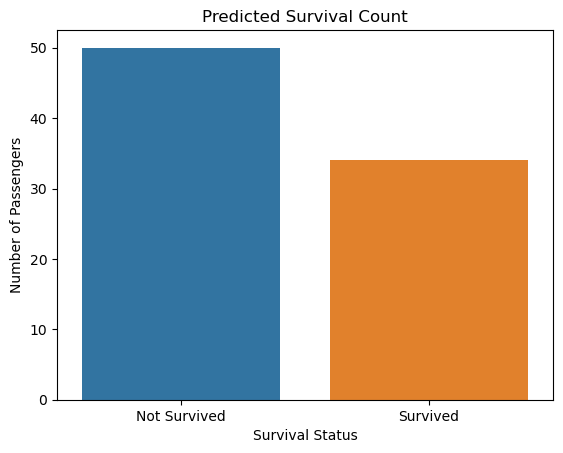

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=output_df, x='Predicted_Survival')
plt.title('Predicted Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.show()
